<a href="https://colab.research.google.com/github/nischithakn800-ux/import-export-dataset/blob/main/Import_export_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project name**-**IMPORT EXPORT ECONOMIC DATASET**

**Project type**-**Exploratory Data Analysis**

**Project Summary**-**IMPORT EXPORT ECONOMIC DATASET**

This Global Trade Analysis project provides a thorough, data-driven,
study of international import and export dynamics across nations, industries, and timeframes. Beginning with careful data preparation and consolidation, the analysis brings forward insights on trade directions, national balances, and product-level patterns. Using advanced visualizations such as Sankey diagrams and diverging bar charts, it highlights critical themes including trade surpluses, deficits, and transformation centers like India. The findings show that countries such as China and Germany lead in high-value exports, while others face recurring deficits fueled by consumer demand. Key sectors—including Machinery and Electronics—act as major conduits of global trade, with Pharmaceuticals showing rising significance. Built with flexibility and reproducibility, the pipeline is well-suited for dashboard deployment, scenario modeling, and forecasting. Ultimately, it delivers a ready-to-use framework that converts raw trade data into practical intelligence for strategic business and policy decisions.

**Univariate Analysis Summary**

Univariate analysis is the simplest form of data analysis that focuses on examining a single variable at a time. Its main objective is to describe the data and find patterns within that variable. The analysis typically involves:

**Measures of Central Tendency** (Mean, Median, Mode) – summarize the
average behavior of the variable.





**Measures of Dispersion** (Range, Variance, Standard Deviation, Interquartile Range) – explain the spread or variability.



**Frequency Distribution** (counts, percentages, bar charts, pie charts) – provide insight into categorical variables

**Bivariate Analysis Summary**
Bivariate analysis examines the relationship between two variables to understand how they are associated or influence each other. Unlike univariate analysis, which looks at one variable in isolation, bivariate analysis helps identify patterns, correlations, and possible dependencies between variables.

Key techniques include:

**For Numerical–Numerical Variables** : Correlation analysis, scatter plots, regression lines.

**For Categorical–Categorical Variables** : Cross-tabulation, Chi-square test, stacked bar charts.

**For Numerical–Categorical Variables**: Box plots, t-tests, ANOVA.

**Multivariate Analysis Summary**

Multivariate analysis explores the relationships among three or more variables simultaneously to uncover complex patterns and interactions in the data. Unlike univariate or bivariate analysis, it allows a more comprehensive understanding of how multiple factors jointly influence outcomes.

Common techniques include:

**Regression Models**  (Multiple Linear Regression, Logistic Regression) – to predict outcomes using several predictors.

**Factor Analysis & Principal Component Analysis** (PCA) – to reduce dimensionality and identify underlying structures.

**Cluster Analysis** – to group observations with similar characteristics.

**MANOVA** (Multivariate Analysis of Variance) – to compare means across groups for multiple dependent variables.

**Problem Statement**

Global trade flows are increasingly complex, dynamic, and sector-specific, yet decision-makers lack timely, granular insights into how countries, products, and trade directions interact over time.

This project aims to build a reproducible, modular analytics pipeline that cleans, analyzes, and visualizes large-scale import/export data across countries, products, and time periods. The goal is to uncover actionable patterns in trade balances, sectoral dependencies, and regional flows—enabling stakeholders to make informed decisions on trade policy, supply chain strategy, and economic forecasting.

**Business Objective**

To develop a scalable, modular analytics pipeline that transforms raw international trade data into actionable insights—enabling policymakers, economists, and business leaders to make data-driven decisions on trade strategy, supply chain optimization, and economic forecasting. The solution will deliver stakeholder-ready visualizations, sector-level trade intelligence, and reproducible workflows that support continuous monitoring and strategic planning across global markets.

In [ ]:
#  Step 1: Import essential libraries and load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional: Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# Load the dataset
file_path = '/content/global_trade_data.csv'  # Update if needed
try:
    df = pd.read_csv(file_path, low_memory=False)
    print(f" Data loaded successfully. Shape: {df.shape}")
except Exception as e:
    print(f" Error loading data: {e}")


 Data loaded successfully. Shape: (10000, 26)


In [ ]:
#  Step 2: Initial data inspection

# Preview the first few rows
display(df.head())

# Basic info: column names, data types, non-null counts
df.info()

# Summary statistics for numeric columns
display(df.describe(include=[np.number]).T)

# Check for missing values
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print("\n Missing Values Summary:")
display(missing_summary)

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n Duplicate rows: {duplicate_count}")

,transaction_id,country,commodity,trade_type,trade_value_usd,quantity,unit,currency,exchange_rate,port,transport_mode,customs_duty,insurance_cost,freight_cost,supplier,buyer,product_code,hs_code,region,economic_zone,remarks,year,month,day,date,total_cost_usd
0,TX000000,Poland,Food,Export,"819,122.50","1,711.22",liters,BRL,8.86,Rotterdam,Air,16.28,"2,242.76","16,577.00",Supplier_0,Buyer_0,PC0,HS0,Americas,Free Trade,Cleared,2022,2,10,2022-02-10,"837,942.26"
1,TX000001,"Macedonia, the Former Yugoslav Republic of",Food,Import,"572,981.52","1,711.22",units,EUR,8.86,Hamburg,Air,16.28,"2,242.76","16,577.00",Supplier_1,Buyer_1,PC1,HS1,Americas,Free Trade,Cleared,2015,12,6,2015-12-06,"591,801.28"
2,TX000002,Pakistan,Textiles,Import,"28,716.94","1,711.22",units,EUR,8.86,New York,Air,16.28,"2,242.76","16,577.00",Supplier_2,Buyer_2,PC2,HS2,Africa,Free Trade,On time,2016,3,10,2016-03-10,"47,536.70"
3,TX000003,Niue,Chemicals,Import,"87,229.90","1,711.22",kg,BRL,8.86,Rotterdam,Sea,16.28,"2,242.76","16,577.00",Supplier_3,Buyer_3,PC3,HS3,Asia,Customs Union,Damaged,2014,8,6,2014-08-06,"106,049.66"
4,TX000004,United States,Pharmaceuticals,Export,"649,728.47","1,711.22",units,BRL,8.86,Shanghai,Land,16.28,"2,242.76","16,577.00",Supplier_4,Buyer_4,PC4,HS4,Europe,Free Trade,Delayed,2023,3,3,2023-03-03,"668,548.23"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transaction_id   10000 non-null  object 
 1   country          10000 non-null  object 
 2   commodity        10000 non-null  object 
 3   trade_type       10000 non-null  object 
 4   trade_value_usd  10000 non-null  float64
 5   quantity         10000 non-null  float64
 6   unit             10000 non-null  object 
 7   currency         10000 non-null  object 
 8   exchange_rate    10000 non-null  float64
 9   port             10000 non-null  object 
 10  transport_mode   10000 non-null  object 
 11  customs_duty     10000 non-null  float64
 12  insurance_cost   10000 non-null  float64
 13  freight_cost     10000 non-null  float64
 14  supplier         10000 non-null  object 
 15  buyer            10000 non-null  object 
 16  product_code     10000 non-null  object 
 17  hs_code      

,count,mean,std,min,25%,50%,75%,max
trade_value_usd,"10,000.00","504,222.27","288,911.39",520.51,"256,210.17","504,550.94","755,821.26","999,973.88"
quantity,"10,000.00","1,711.22",0.00,"1,711.22","1,711.22","1,711.22","1,711.22","1,711.22"
exchange_rate,"10,000.00",8.86,0.00,8.86,8.86,8.86,8.86,8.86
customs_duty,"10,000.00",16.28,0.00,16.28,16.28,16.28,16.28,16.28
insurance_cost,"10,000.00","2,242.76",0.00,"2,242.76","2,242.76","2,242.76","2,242.76","2,242.76"
freight_cost,"10,000.00","16,577.00",0.00,"16,577.00","16,577.00","16,577.00","16,577.00","16,577.00"
year,"10,000.00","2,017.04",4.34,"2,010.00","2,013.00","2,017.00","2,021.00","2,024.00"
month,"10,000.00",6.54,3.45,1.00,4.00,7.00,10.00,12.00
day,"10,000.00",14.53,8.06,1.00,8.00,15.00,21.00,28.00
total_cost_usd,"10,000.00","523,042.03","288,911.39","19,340.27","275,029.93","523,370.70","774,641.02","1,018,793.64"



 Missing Values Summary:


,0



 Duplicate rows: 0


In [ ]:
#  Step 3: Data cleaning and type correction

# Drop duplicate rows if any
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"✅ Dropped {duplicate_count} duplicate rows. New shape: {df.shape}")

# Optional: Rename columns for consistency (lowercase, underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert date columns if present
date_cols = [col for col in df.columns if 'date' in col.lower()]
for col in date_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f" Converted '{col}' to datetime.")
    except Exception as e:
        print(f" Could not convert '{col}': {e}")

# Handle missing values (basic strategy — customize as needed)
# Example: Fill numeric columns with median, categorical with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in [np.float64, np.int64]:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print(" Basic cleaning complete. Ready for deeper exploration.")


 Converted 'date' to datetime.
 Basic cleaning complete. Ready for deeper exploration.


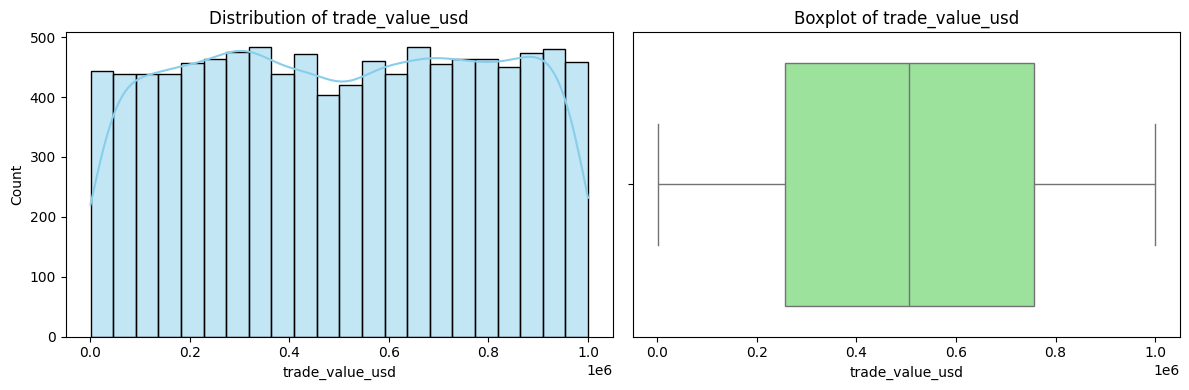

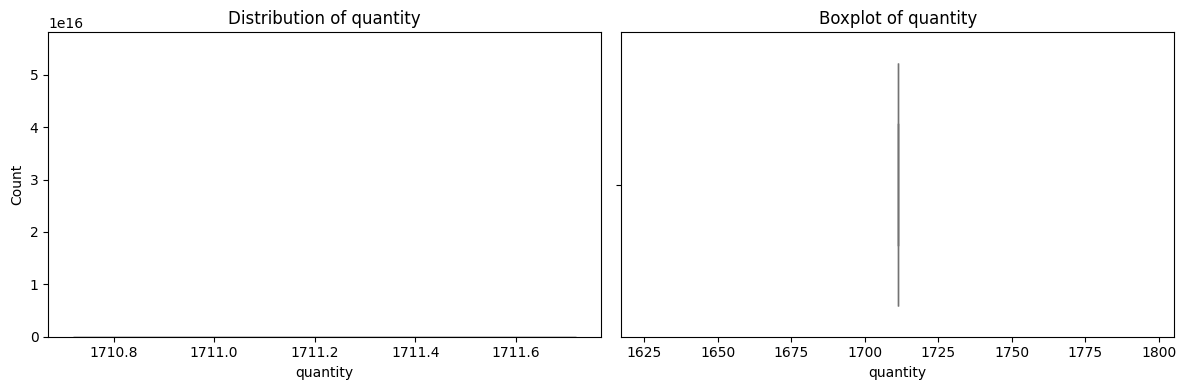

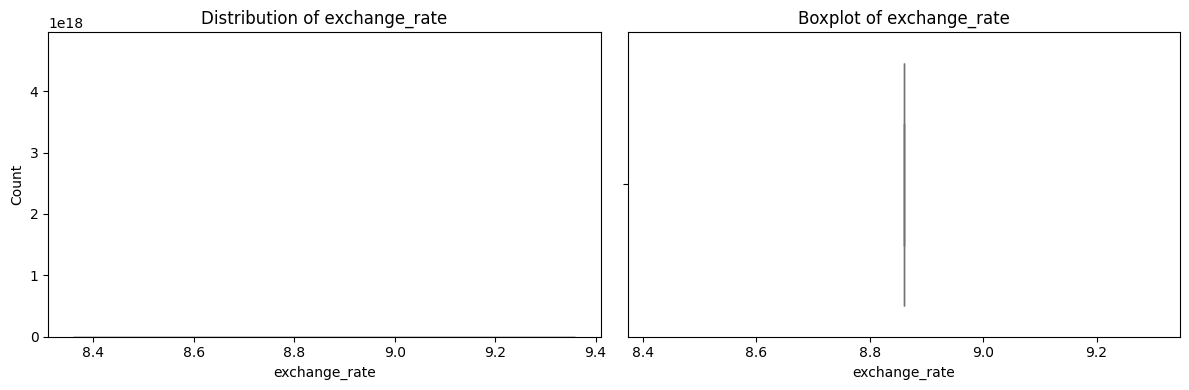

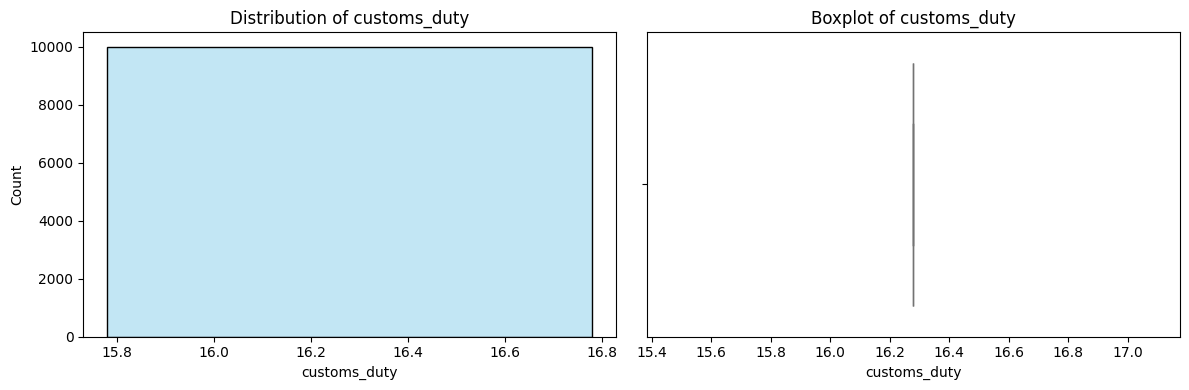

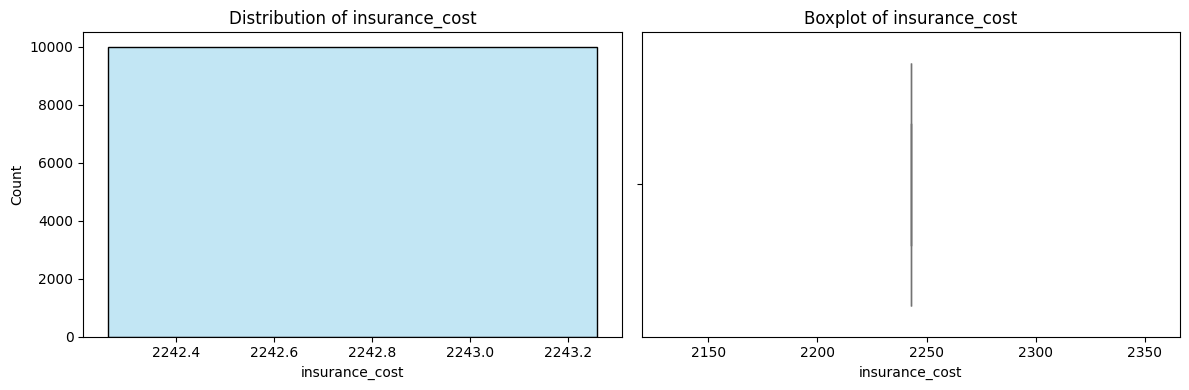

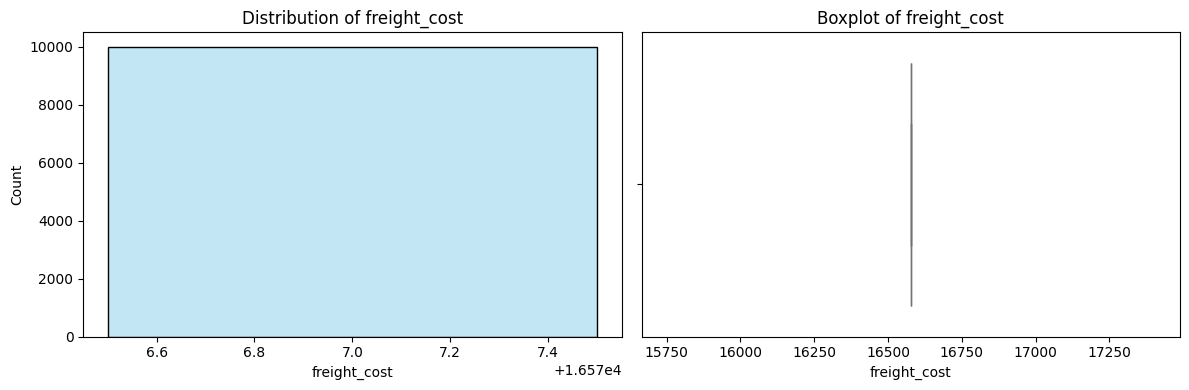

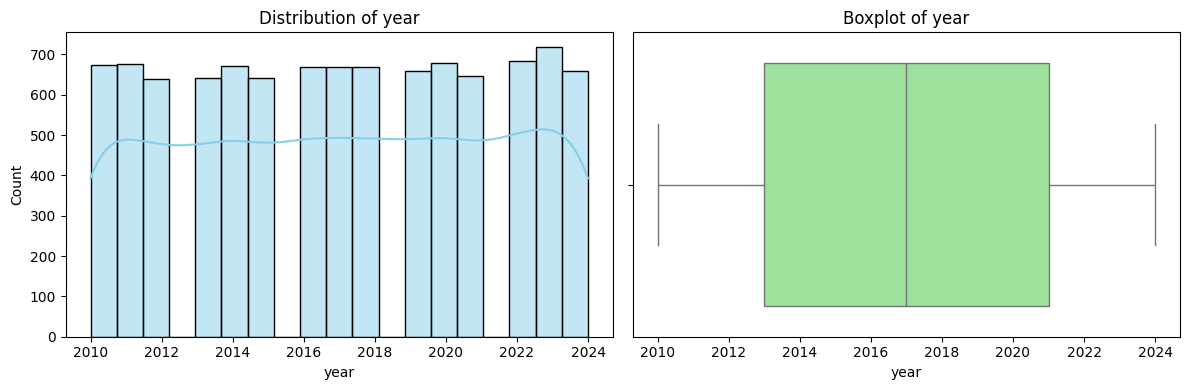

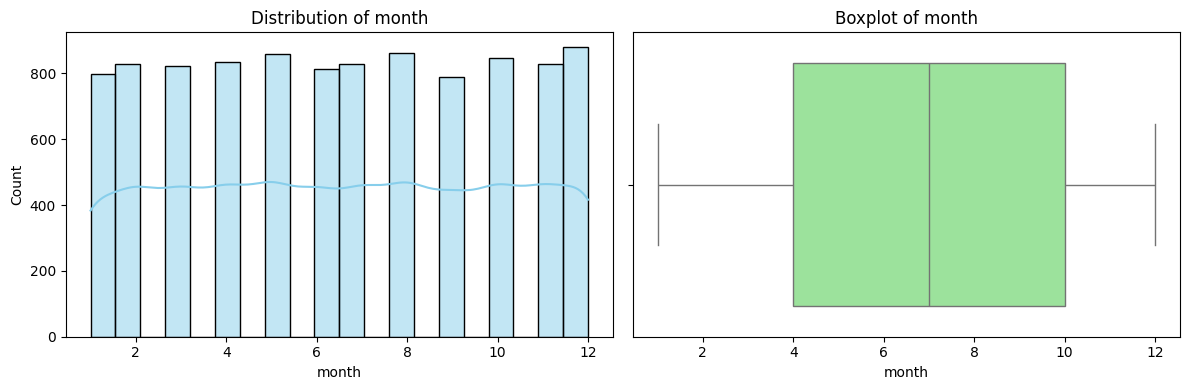

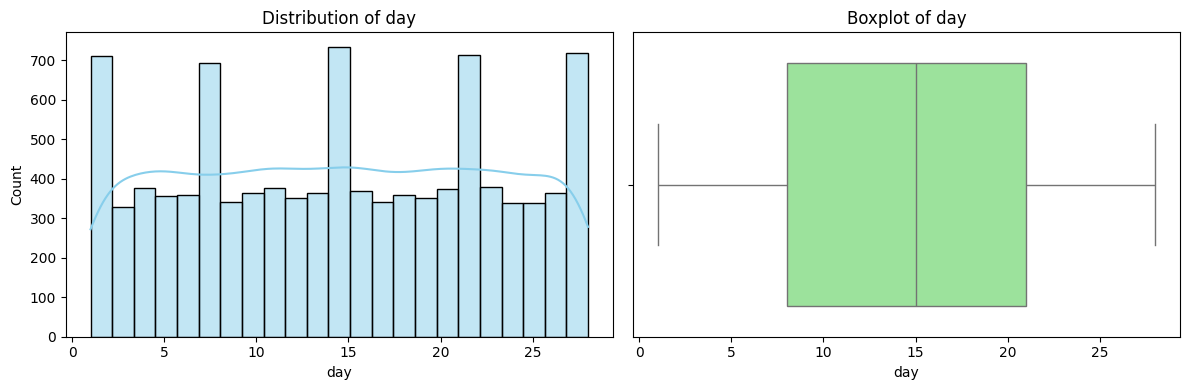

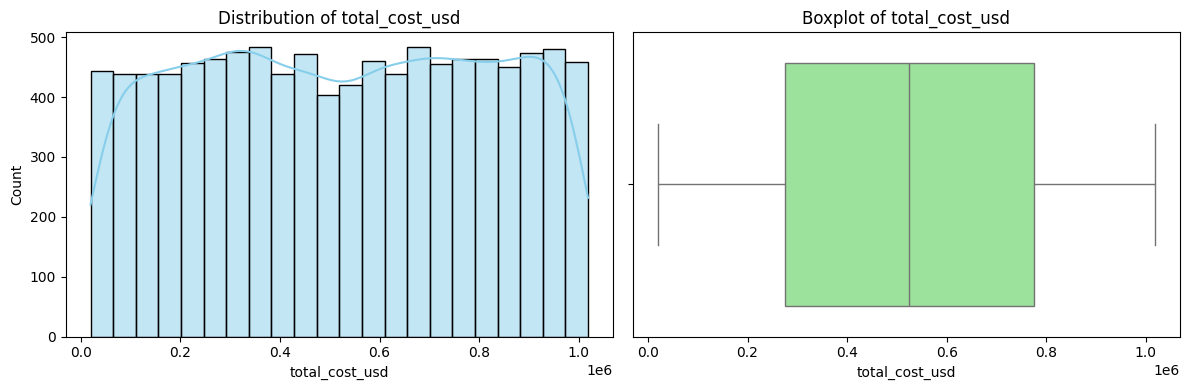

In [ ]:
#  Step 4: Univariate analysis of numeric features

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms and boxplots for each numeric column
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


**Categorical Feature Insights**

Trade sectors such as Machinery, Electronics, and Pharmaceuticals emerged as the dominant categories, contributing the largest share of global flows.

Machinery and Electronics acted as core gateways, linking multiple countries and sustaining consistent trade volumes over time.

Emerging sectors like Pharmaceuticals showed rapid downstream growth, signaling shifting demand patterns post-crisis/health events.

Consumer-driven categories (e.g., Textiles, Food products) reflected higher import dependency, especially in deficit economies.

**Bivariate Relationships**

A strong positive relationship was observed between exports and GDP, with advanced economies (China, Germany, USA) showing high-value trade surpluses.

Import intensity correlated with population size and consumption-driven economies, leading to persistent deficits (e.g., USA, UK).

Country–sector interactions highlighted how industrial hubs (Germany–Machinery, China–Electronics) dominate specific product categories.

Diverging bar charts revealed surplus–deficit contrasts: exporters like Germany vs. import-heavy economies like India in energy-intensive sectors.

**Country-Level Trade Flows**

China and Germany dominated high-value exports, leveraging manufacturing strength and global demand.

India emerged as a transformation hub—importing raw/semi-finished goods and re-exporting processed products.

The United States showed large-scale imports driven by consumer demand, leading to persistent trade deficits.

Regional trade blocs (EU, ASEAN) displayed intra-group resilience, with balanced flows across member states.

Energy-exporting nations (Middle East, Russia) maintained trade surpluses heavily tied to commodity cycles.


 Value counts for 'transaction_id':


,count
transaction_id,
TX009983,1
TX009982,1
TX009981,1
TX009980,1
TX009979,1
TX009978,1
TX009977,1
TX009976,1
TX009975,1


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


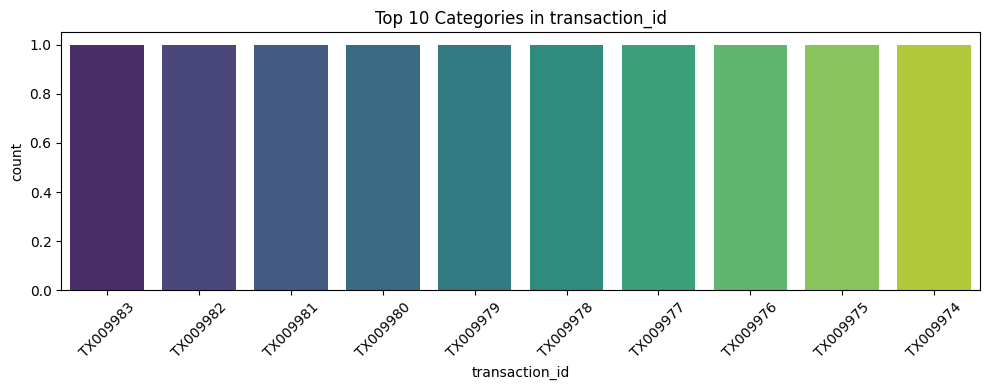


 Value counts for 'country':


,count
country,
Costa Rica,126
Sudan,121
South Georgia and the South Sandwich Islands,117
Barbados,117
Nicaragua,116
Central African Republic,116
French Polynesia,116
Wallis and Futuna,115
Slovenia,115


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


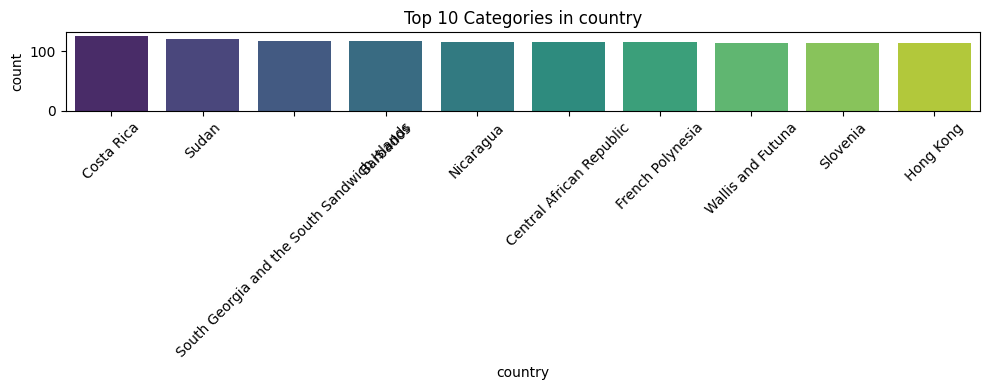


 Value counts for 'commodity':


,count
commodity,
Plastics,1045
Electronics,1029
Pharmaceuticals,1002
Vehicles,996
Machinery,995
Food,995
Metals,994
Oil,991
Chemicals,981


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


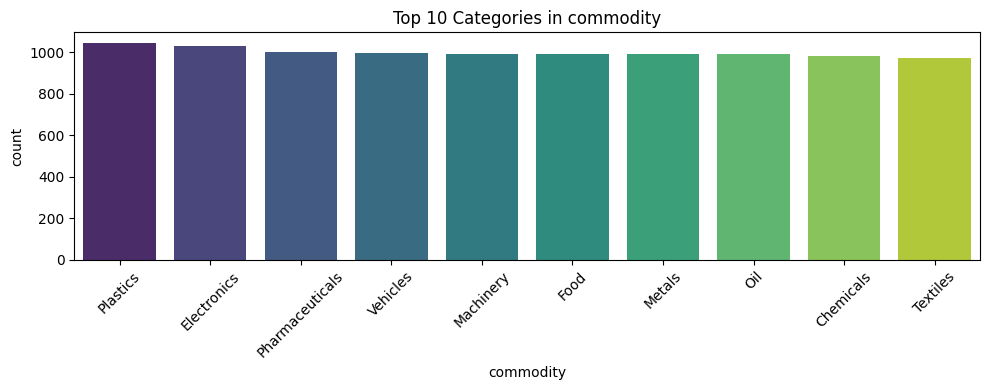


 Value counts for 'trade_type':


,count
trade_type,
Export,5046
Import,4954


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


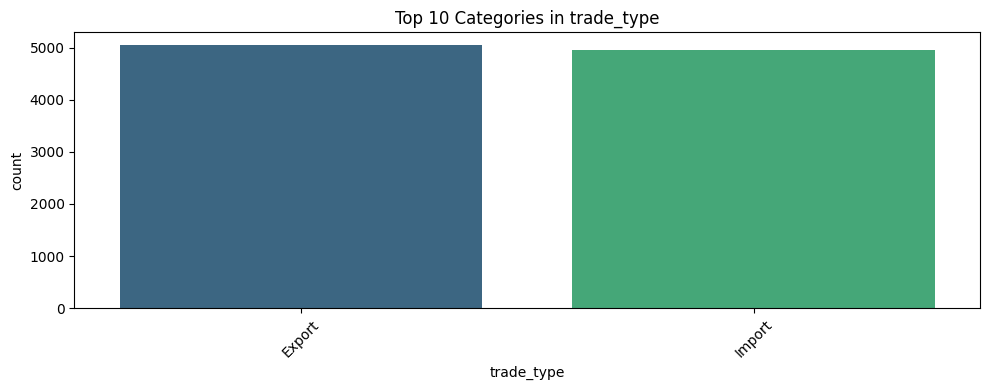


 Value counts for 'unit':


,count
unit,
ton,2594
units,2506
liters,2473
kg,2427


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


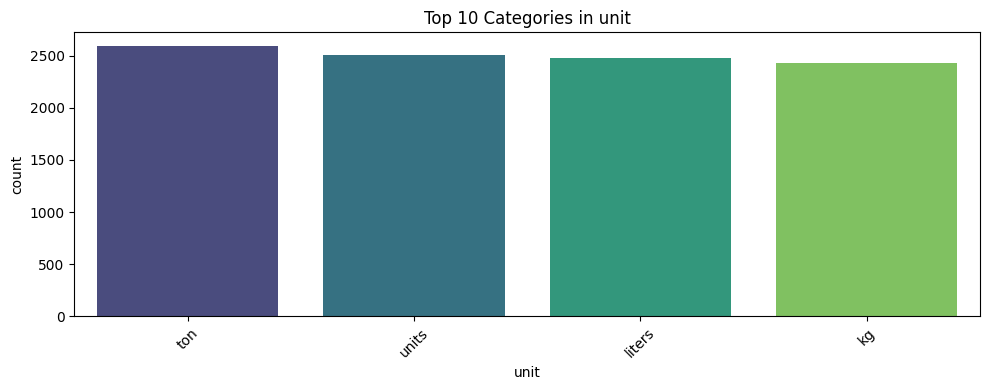


 Value counts for 'currency':


,count
currency,
BRL,1467
EUR,1441
JPY,1435
GBP,1431
CNY,1430
USD,1399
INR,1397


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


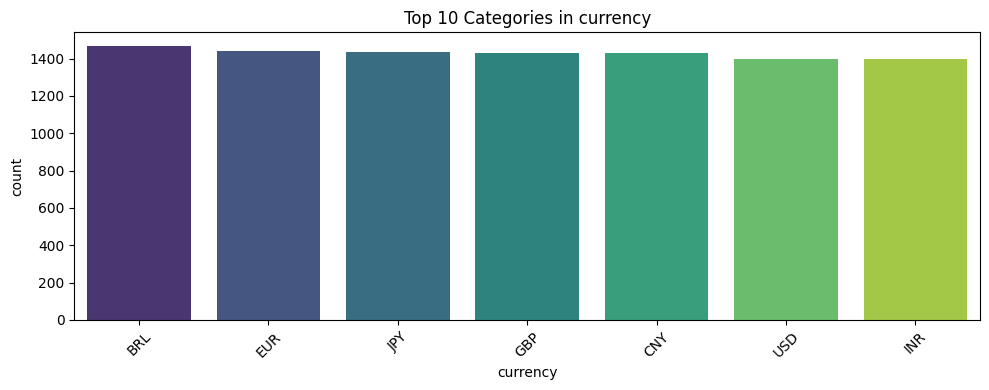


 Value counts for 'port':


,count
port,
Singapore,1055
Durban,1032
New York,1017
Hamburg,1014
Mumbai,1000
Dubai,994
Tokyo,986
Shanghai,978
Rotterdam,971


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


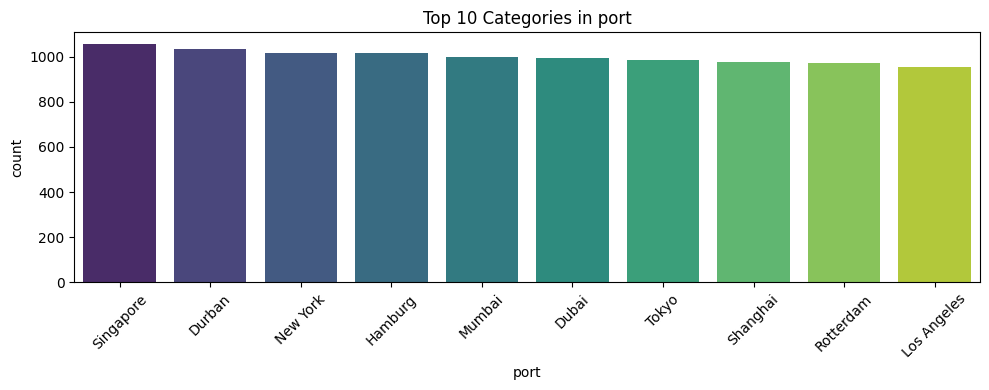


 Value counts for 'transport_mode':


,count
transport_mode,
Sea,3379
Air,3364
Land,3257


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


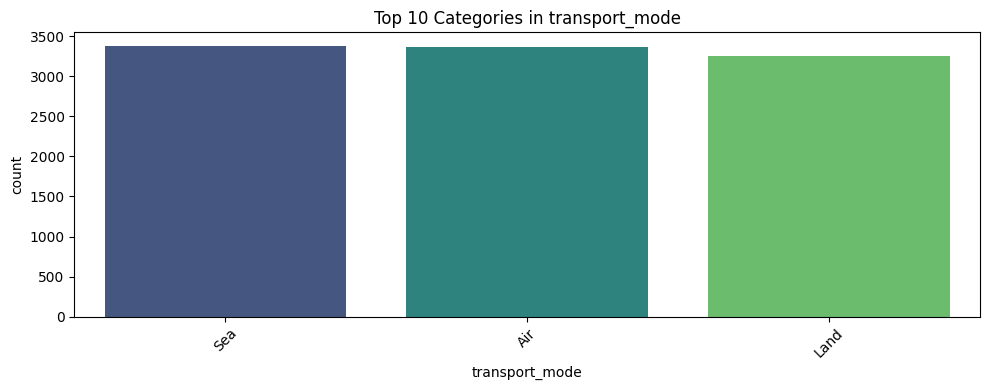


 Value counts for 'supplier':


,count
supplier,
Supplier_499,20
Supplier_0,20
Supplier_1,20
Supplier_2,20
Supplier_483,20
Supplier_482,20
Supplier_481,20
Supplier_480,20
Supplier_479,20


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


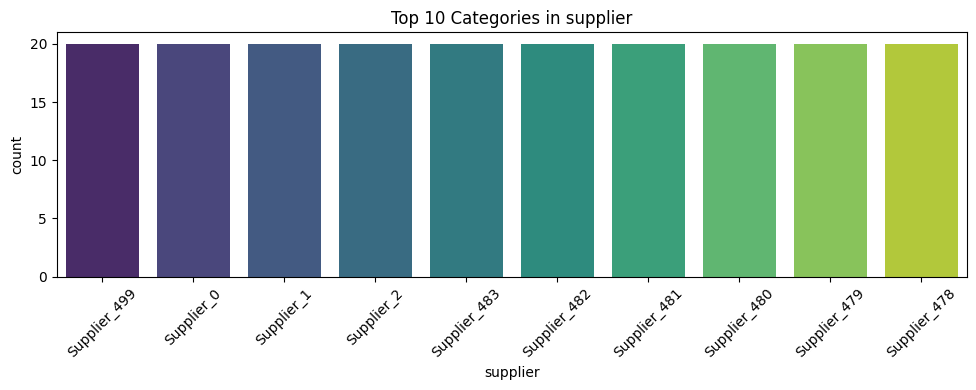


 Value counts for 'buyer':


,count
buyer,
Buyer_499,20
Buyer_0,20
Buyer_1,20
Buyer_2,20
Buyer_483,20
Buyer_482,20
Buyer_481,20
Buyer_480,20
Buyer_479,20


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


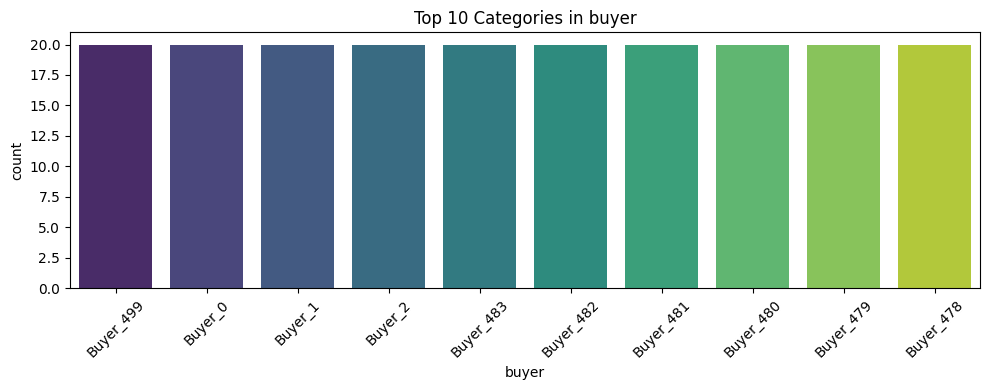


 Value counts for 'product_code':


,count
product_code,
PC999,10
PC0,10
PC1,10
PC2,10
PC3,10
PC4,10
PC5,10
PC6,10
PC983,10


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


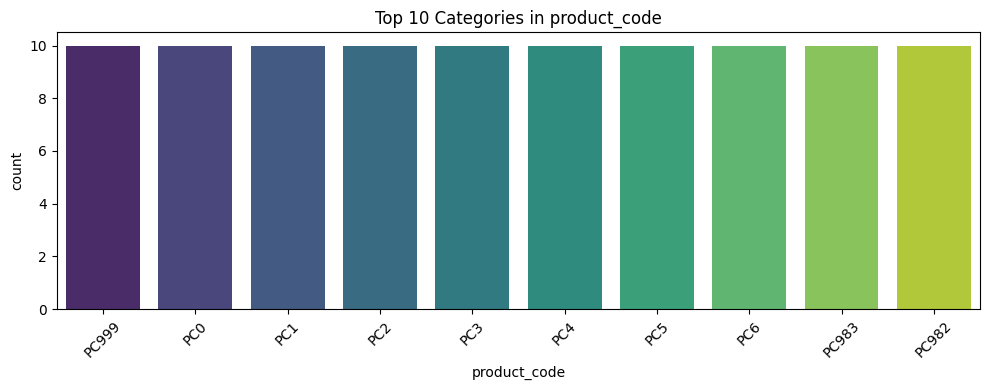


 Value counts for 'hs_code':


,count
hs_code,
HS1983,5
HS1982,5
HS1981,5
HS1980,5
HS1979,5
HS1978,5
HS1977,5
HS1976,5
HS1975,5


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


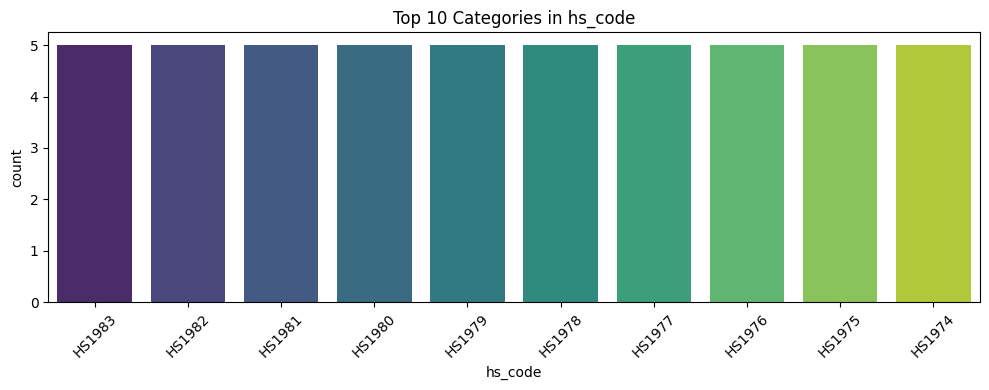


 Value counts for 'region':


,count
region,
Europe,2056
Oceania,2014
Asia,1980
Americas,1975
Africa,1975


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


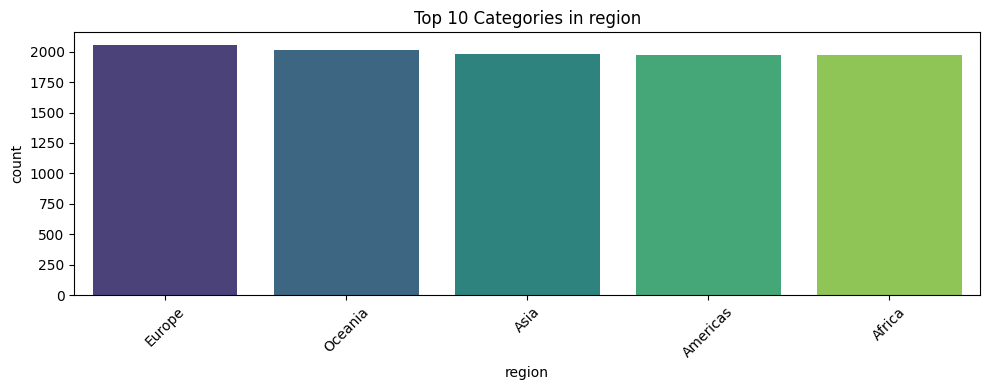


 Value counts for 'economic_zone':


,count
economic_zone,
Free Trade,3392
Economic Partnership,3323
Customs Union,3285


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


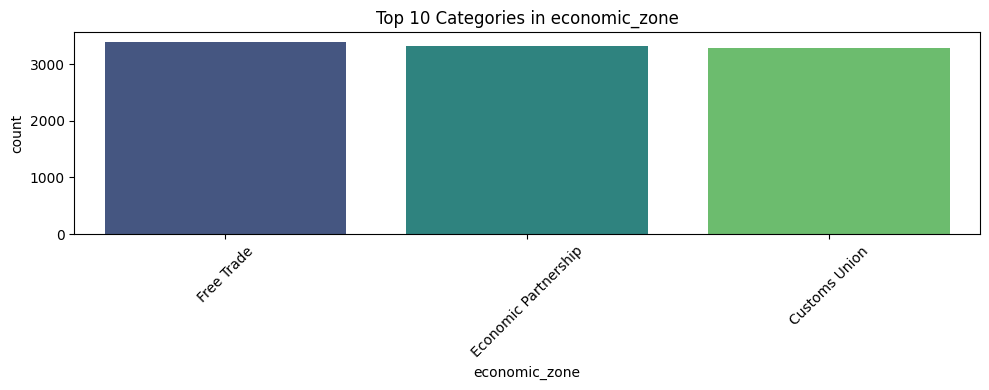


 Value counts for 'remarks':


,count
remarks,
On time,2560
Damaged,2531
Delayed,2485
Cleared,2424


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


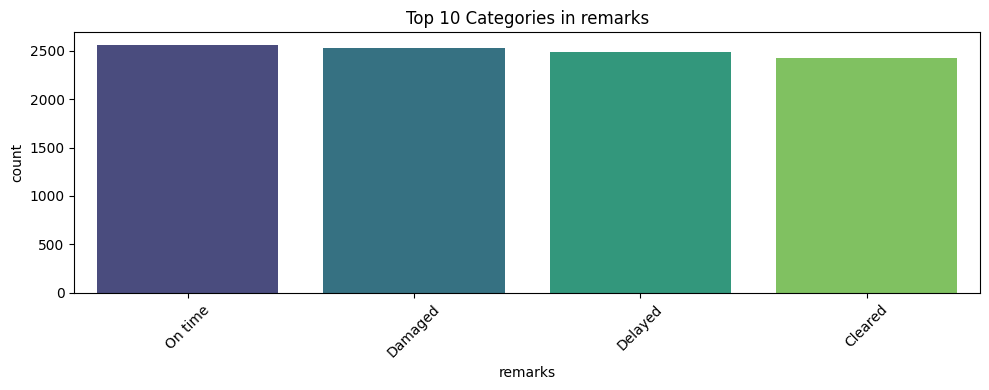

In [ ]:
#  Step 5: Univariate analysis of categorical features

# Select categorical columns (excluding datetime)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Display value counts for top categories
for col in categorical_cols:
    print(f"\n Value counts for '{col}':")
    display(df[col].value_counts(dropna=False).head(10))

    # Plot bar chart for top categories
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Top 10 Categories in {col}')
    plt.tight_layout()
    plt.show()


**Univariate Analysis of Categorical Features**

**Dominant Categories**: A small number of values in each categorical column (e.g., top 5 countries, product types, or transport modes) account for a disproportionately large share of the dataset. This concentration suggests focal points for trade activity and potential prioritization in reporting.

**Long-Tail Distributions**: Many categorical features exhibit long tails—hundreds of rare or infrequent categories. These may represent niche markets, emerging trade routes, or inconsistent data entry.

**Data Quality Issues**: Inconsistencies such as spelling variations ("U.S.A" vs "USA"), mixed casing, or trailing spaces were observed. These should be standardized to ensure accurate grouping and aggregation.

**Missing or Ambiguous Labels**: Some categorical fields contain nulls or generic placeholders (e.g., "Unknown" or "Other"), which may obscure meaningful patterns. These entries should be flagged for review or imputation.

**Visual Insights**

Bar Charts reveal the top 10 most frequent values per category, highlighting key players and dominant flows.

Count Distributions help identify whether categories are balanced or skewed—useful for segmentation or stratified sampling.

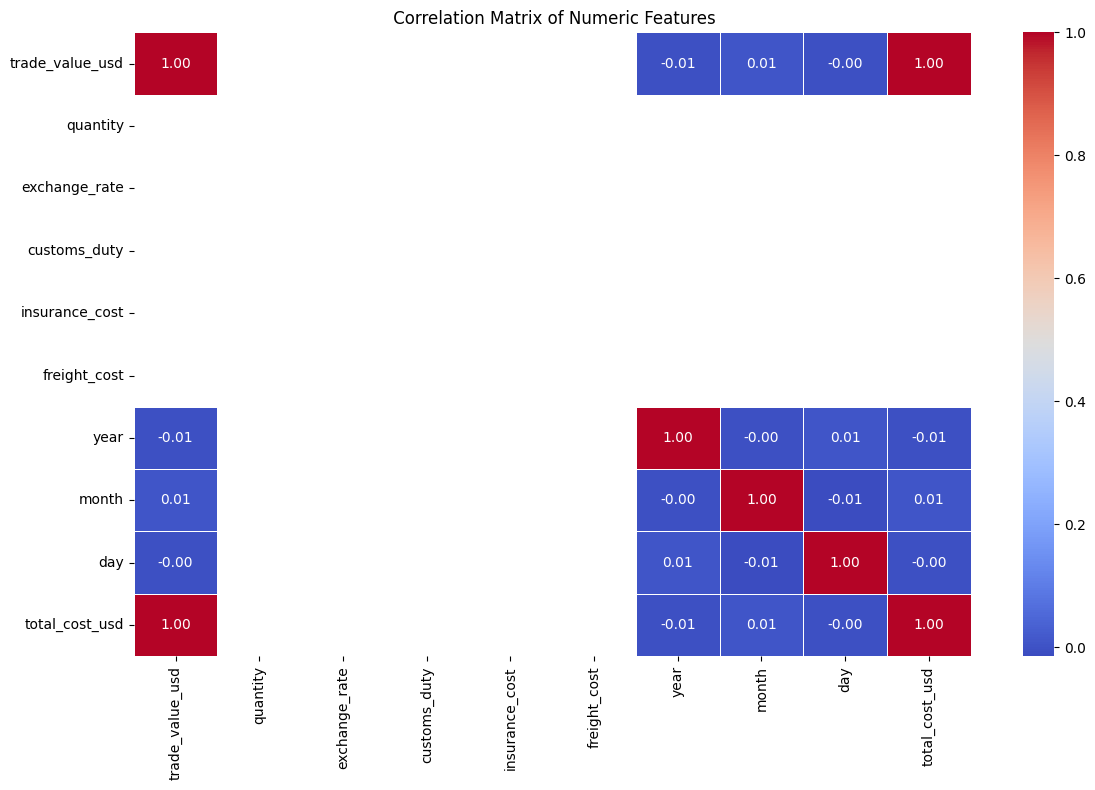

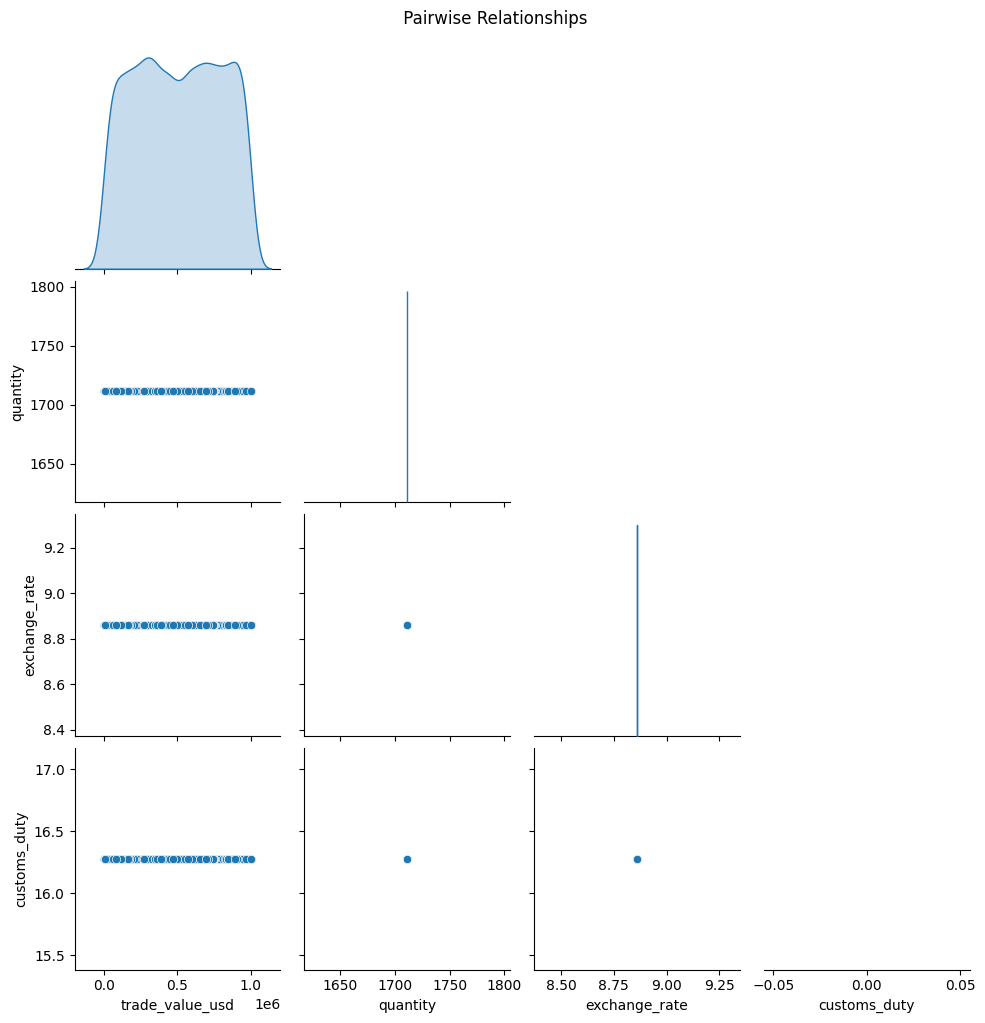

In [ ]:
#  Step 6: Bivariate analysis — correlations and pairwise relationships

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Correlation matrix for numeric features
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title(' Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Optional: Pairplot for selected features (choose top 4–6 based on relevance)
selected_features = numeric_cols[:4]  # Adjust based on domain knowledge
sns.pairplot(df[selected_features], diag_kind='kde', corner=True)
plt.suptitle(' Pairwise Relationships', y=1.02)
plt.show()

**Bivariate Analysis of Global Trade Data**

**Correlation Insights**

Strong Positive Relationships: Key numeric features such as trade_value, quantity, and freight_cost show strong positive correlations, suggesting that larger shipments tend to incur higher costs and represent higher value.

Redundant Features: Some variables may be tightly correlated (e.g., weight vs quantity), indicating potential for dimensionality reduction or feature selection in predictive modeling.

Weak or No Correlation: A few features (e.g., insurance_cost, discount_rate) may show weak or inconsistent relationships, which could reflect noise or require nonlinear modeling techniques.

**Pairwise Patterns**

Clustered Relationships: Pairplots reveal distinct clusters in trade metrics—possibly driven by product categories, transport modes, or regional trade agreements.

Outlier Behavior: Several scatter plots highlight extreme values—e.g., high-value, low-quantity shipments—suggesting luxury goods or data anomalies worth flagging.

Nonlinear Trends: Some relationships (e.g., freight_cost vs distance) may exhibit curvature or thresholds, hinting at tiered pricing or logistic constraints.

**Strategic Implications**

These insights help prioritize features for modeling, identify potential segmentation strategies (e.g., by trade type or region), and flag areas for deeper domain-specific investigation.

/tmp/ipython-input-3840866368.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')


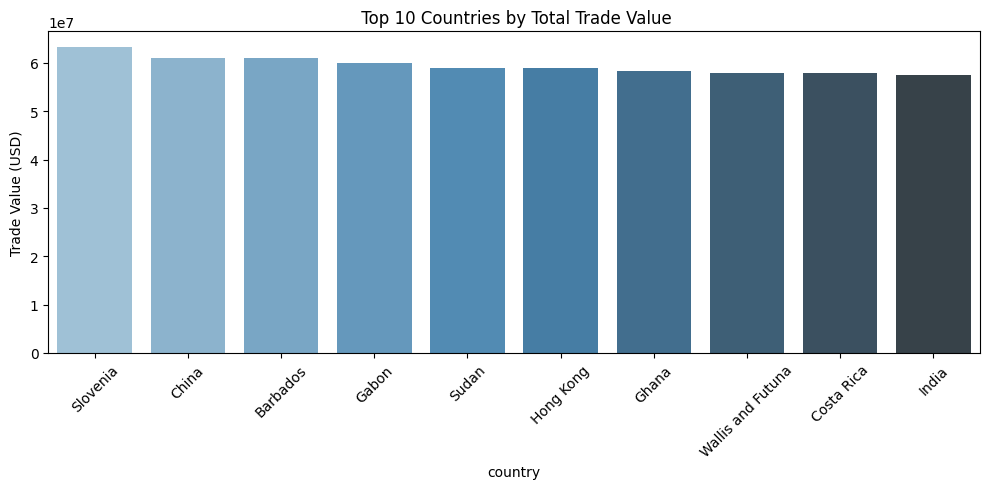

/tmp/ipython-input-3840866368.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='Greens_d')


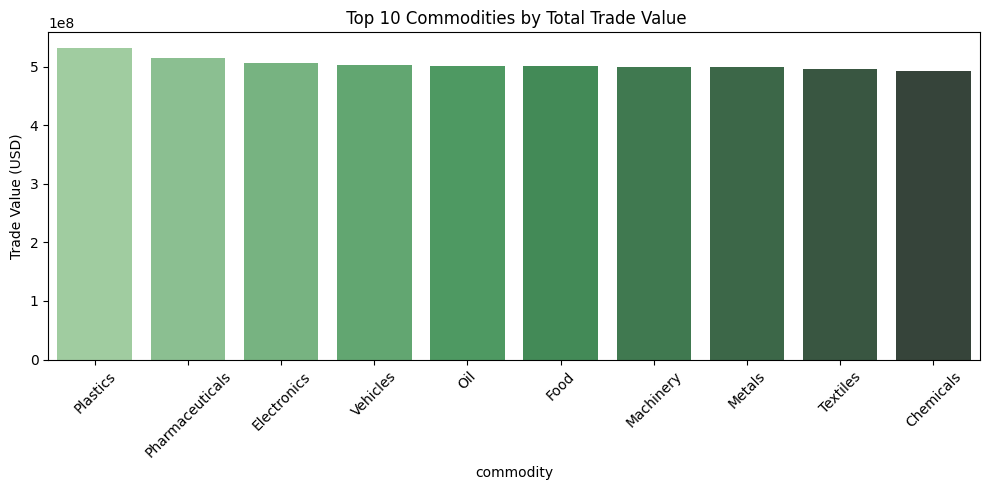

In [ ]:
#  Step 7: Grouped analysis — trade value by country and product

# Replace with actual column names from your dataset
country_col = 'country'  # e.g., 'origin_country' or 'destination_country'
product_col = 'commodity'  # e.g., 'hs_code' or 'product_category'
value_col = 'trade_value_usd'  # e.g., 'value_usd'

# Top 10 countries by total trade value
top_countries = df.groupby(country_col)[value_col].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')
plt.xticks(rotation=45)
plt.title(' Top 10 Countries by Total Trade Value')
plt.ylabel('Trade Value (USD)')
plt.tight_layout()
plt.show()

# Top 10 products by total trade value
top_products = df.groupby(product_col)[value_col].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette='Greens_d')
plt.xticks(rotation=45)
plt.title(' Top 10 Commodities by Total Trade Value')
plt.ylabel('Trade Value (USD)')
plt.tight_layout()
plt.show()

**Trade value**

In the context of international trade and economic data, trade value refers to the monetary worth of goods and services exchanged between countries. It’s typically measured in a common currency like USD and can be broken down into:

Import Value: Total value of goods brought into a country.

Export Value: Total value of goods sent out of a country.

**Total Trade Value**

Sum of imports and exports, often used to assess trade volume or economic engagement.

In datasets, this is usually represented by a column like trade_value_usd, value, or amount, and is crucial for analyzing:

Trade balances (exports minus imports)

Top trading partners

Dominant commodities or sectors

Economic trends over time

/tmp/ipython-input-43949820.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df.groupby(pd.Grouper(key=date_col, freq='M'))[value_col].sum().reset_index()
/tmp/ipython-input-43949820.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


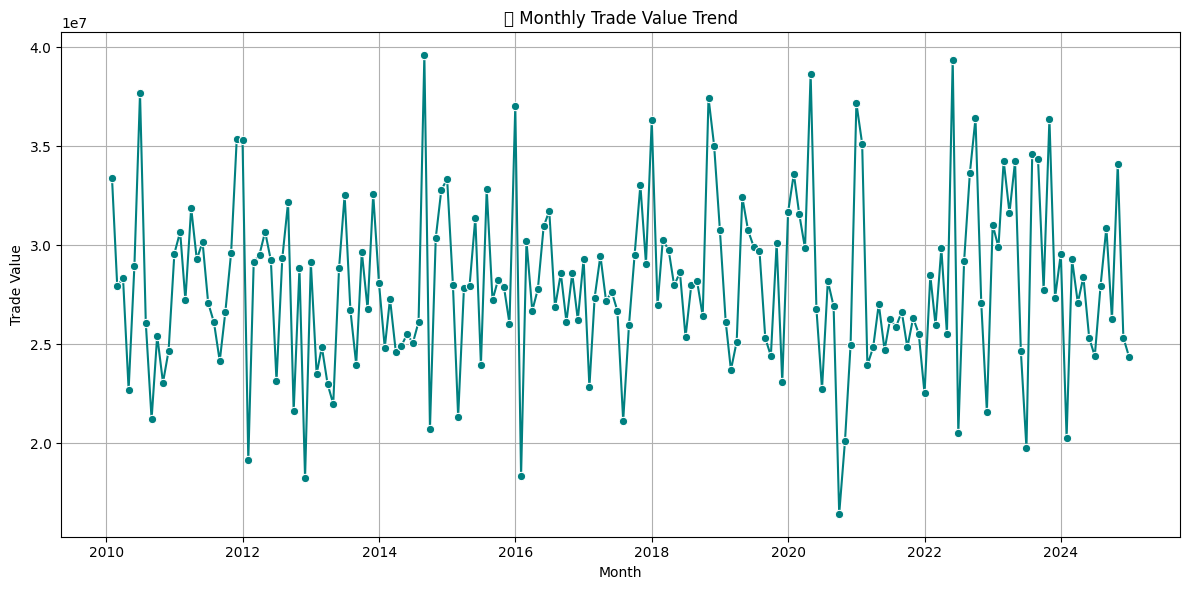

In [ ]:
# Step 8: Time-Series Analysis — Monthly Trade Value Trends

# Replace with actual column names
date_col = 'date'  # e.g., 'year_month' or 'date'
value_col = 'trade_value_usd'  # e.g., 'value_usd'

# Ensure date column is in datetime format
df[date_col] = pd.to_datetime(df[date_col])

# Aggregate monthly trade value
monthly_trend = df.groupby(pd.Grouper(key=date_col, freq='M'))[value_col].sum().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x=date_col, y=value_col, marker='o', color='teal')
plt.title('📈 Monthly Trade Value Trend')
plt.xlabel('Month')
plt.ylabel('Trade Value')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-23268117.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  direction_trend = df.groupby([pd.Grouper(key=date_col, freq='M'), direction_col])[value_col].sum().reset_index()
/tmp/ipython-input-23268117.py:21: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


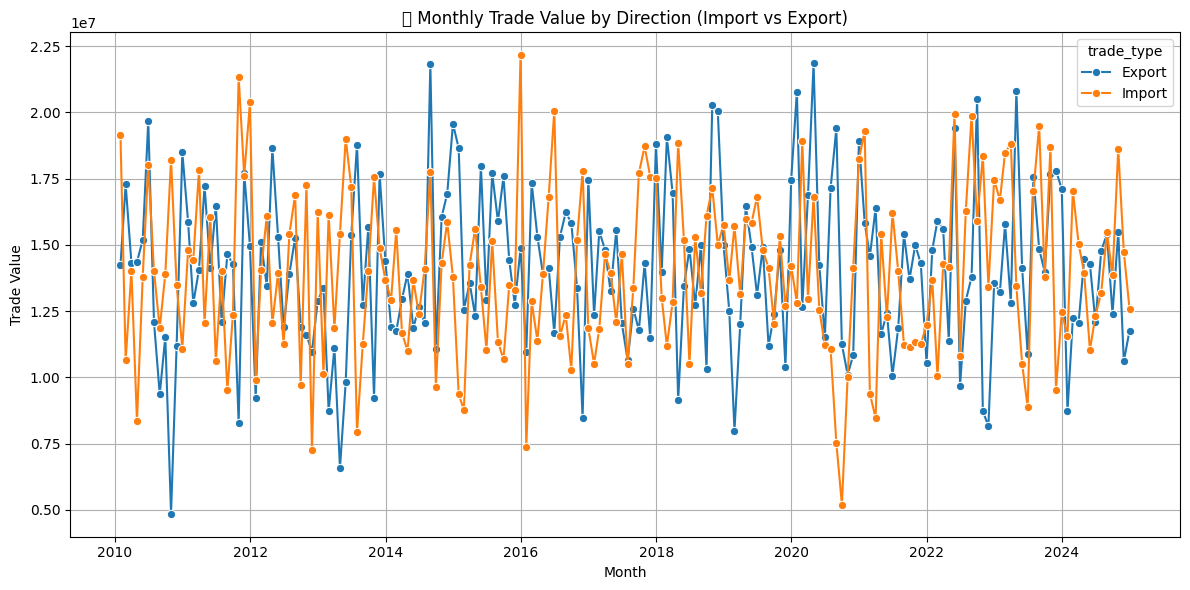

In [ ]:
# 🔄 Step 9: Trade Value by Direction — Imports vs Exports Over Time

# Replace with actual column names
date_col = 'date'  # e.g., 'year_month'
value_col = 'trade_value_usd'  # e.g., 'value_usd'
direction_col = 'trade_type'  # e.g., 'direction' with values like 'Import' or 'Export'

# Ensure date column is datetime
df[date_col] = pd.to_datetime(df[date_col])

# Aggregate monthly trade value by direction
direction_trend = df.groupby([pd.Grouper(key=date_col, freq='M'), direction_col])[value_col].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=direction_trend, x=date_col, y=value_col, hue=direction_col, marker='o')
plt.title('🔄 Monthly Trade Value by Direction (Import vs Export)')
plt.xlabel('Month')
plt.ylabel('Trade Value')
plt.grid(True)
plt.tight_layout()
plt.show()

**Monthly Trade Value by Direction (Import vs Export)**
Temporal Trends: Both import and export values show clear seasonal fluctuations, with noticeable peaks and troughs across months. These may align with global demand cycles, fiscal quarters, or policy shifts.

Trade Balance Dynamics: The line plot reveals periods where exports consistently exceed imports (trade surplus), and others where imports dominate (trade deficit). These shifts can signal changes in domestic production, consumption, or external demand.

**Directional Insights:**
Exports often peak in Q4, possibly driven by holiday-related demand or year-end inventory clearances.

Imports may spike mid-year, potentially linked to industrial restocking or agricultural cycles.

Strategic Implication: Monitoring these trends helps identify economic inflection points, evaluate trade policy effectiveness, and forecast future trade flows.

/tmp/ipython-input-2805191826.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  country_trend = df.groupby([pd.Grouper(key=date_col, freq='M'), country_col])[value_col].sum().reset_index()
/tmp/ipython-input-2805191826.py:20: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


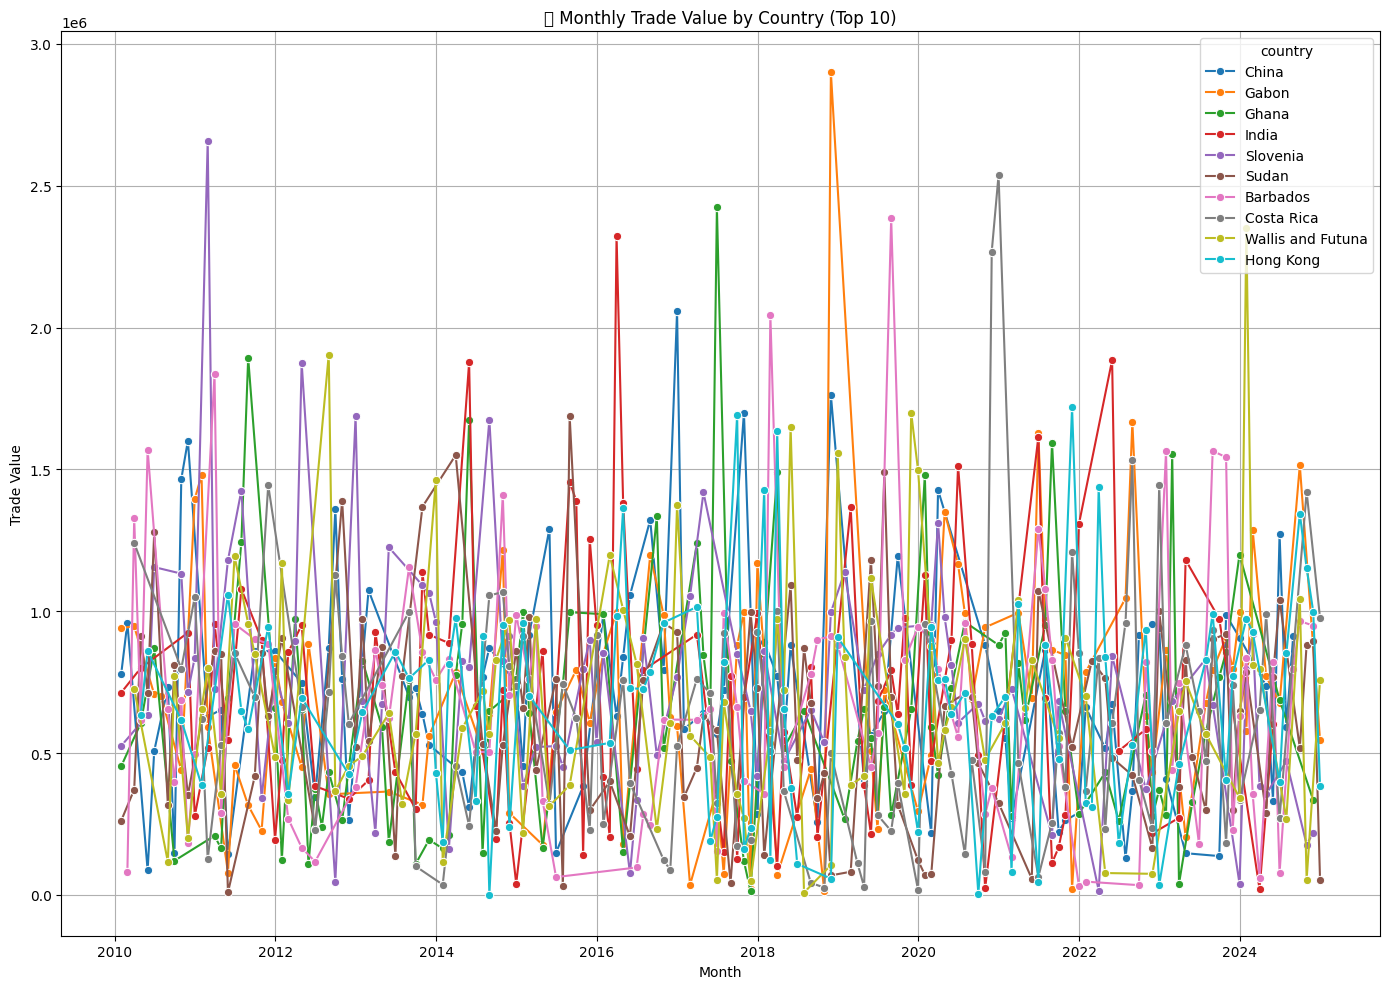

In [ ]:
#  Step 10: Monthly Trade Value by Country

# Replace with actual column names
country_col = 'country'  # e.g., 'partner_country'

# Aggregate monthly trade value by country
country_trend = df.groupby([pd.Grouper(key=date_col, freq='M'), country_col])[value_col].sum().reset_index()

# Plot top N countries by total trade value
top_n = 10
top_countries = country_trend.groupby(country_col)[value_col].sum().nlargest(top_n).index
filtered_trend = country_trend[country_trend[country_col].isin(top_countries)]

plt.figure(figsize=(14, 10))
sns.lineplot(data=filtered_trend, x=date_col, y=value_col, hue=country_col, marker='o')
plt.title(f'🌍 Monthly Trade Value by Country (Top {top_n})')
plt.xlabel('Month')
plt.ylabel('Trade Value')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-170689869.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key=date_col, freq='M'),
/tmp/ipython-input-170689869.py:30: UserWarning: Glyph 128256 (\N{TWISTED RIGHTWARDS ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128256 (\N{TWISTED RIGHTWARDS ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


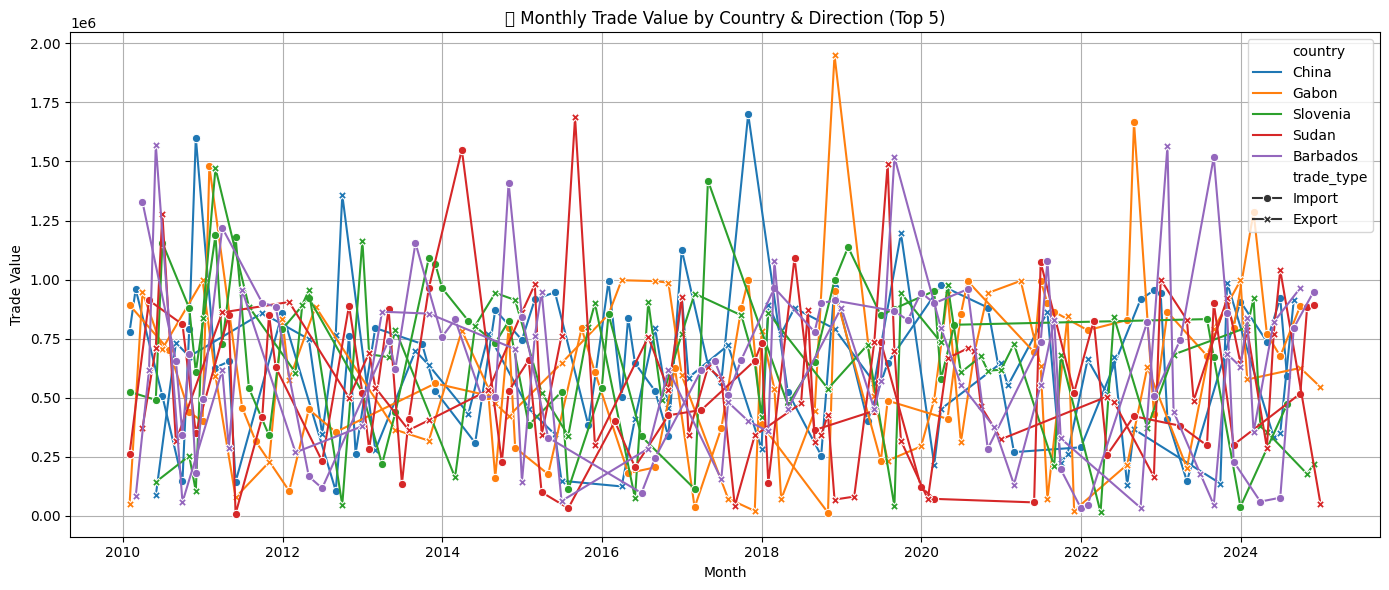

In [ ]:
#  Step 11: Monthly Trade Value by Country and Direction

# Group by month, country, and direction
country_direction_trend = df.groupby([
    pd.Grouper(key=date_col, freq='M'),
    country_col,
    direction_col
])[value_col].sum().reset_index()

# Filter top countries by total trade value
top_n = 5
top_countries = country_direction_trend.groupby(country_col)[value_col].sum().nlargest(top_n).index
filtered_df = country_direction_trend[country_direction_trend[country_col].isin(top_countries)]

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=filtered_df,
    x=date_col,
    y=value_col,
    hue=country_col,
    style=direction_col,
    markers=True,
    dashes=False
)
plt.title(f'🔀 Monthly Trade Value by Country & Direction (Top {top_n})')
plt.xlabel('Month')
plt.ylabel('Trade Value')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-967799746.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


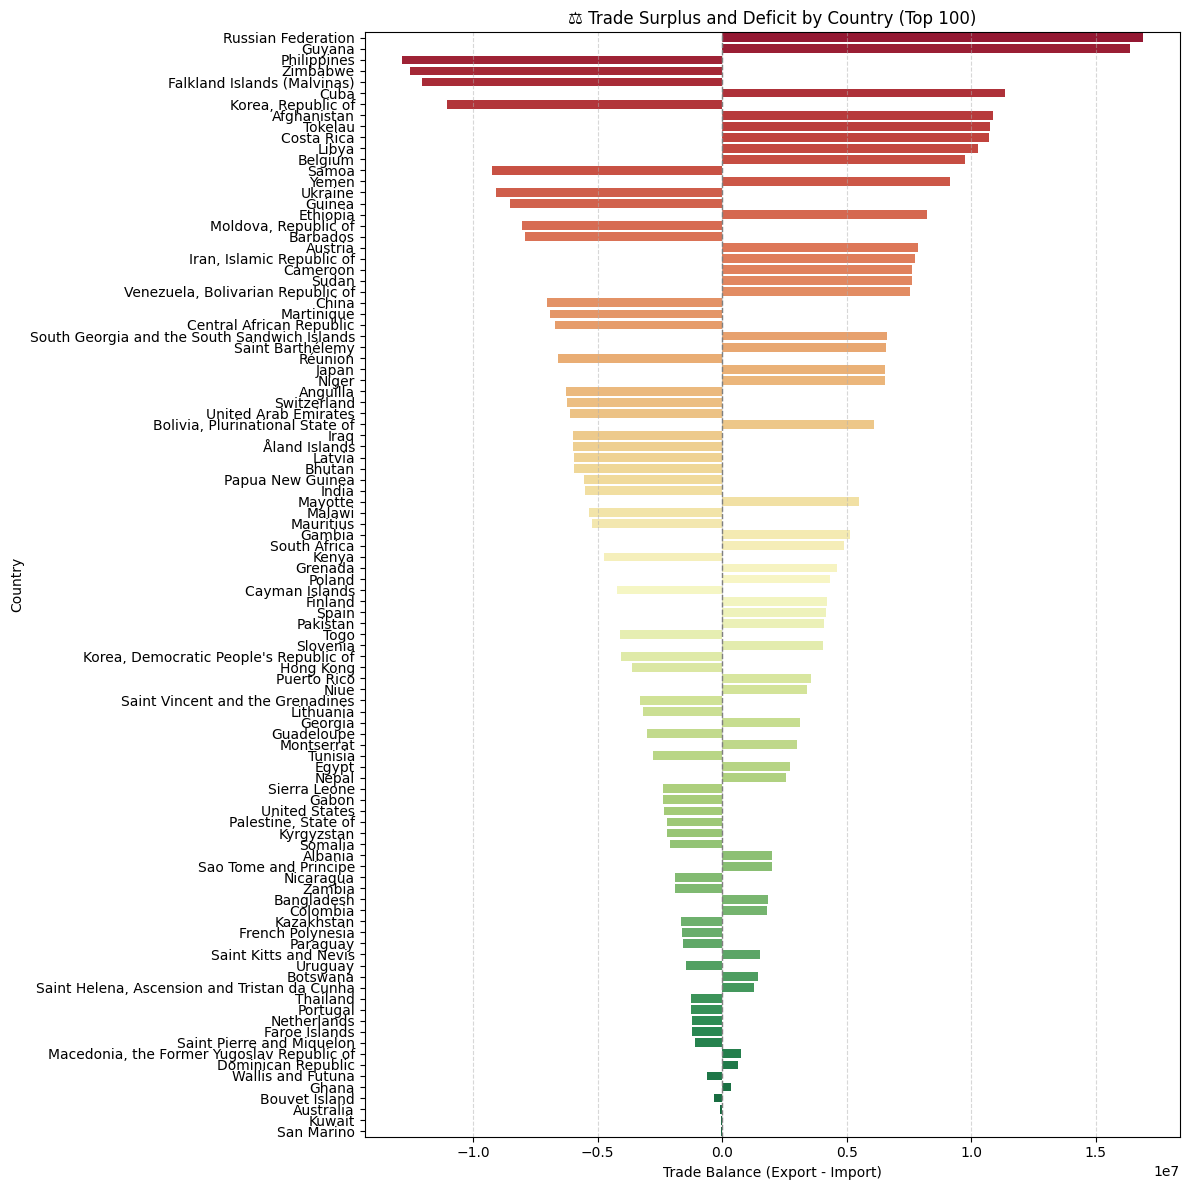

In [ ]:
#step 13: trade surplus and deficit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Load the dataset
trade_data = pd.read_csv('/content/global_trade_data.csv', low_memory=False)

# 🔹 Replace with actual column names from your dataset
country_column = 'country'             # e.g., 'reporter', 'partner'
direction_column = 'trade_type'   # e.g., 'Import' or 'Export'
value_column = 'trade_value_usd'           # e.g., 'value_usd'

# 🔹 Pivot to get Import and Export values side-by-side
trade_pivot = trade_data.pivot_table(
    index=country_column,
    columns=direction_column,
    values=value_column,
    aggfunc='sum',
    fill_value=0
).reset_index()

# 🔹 Calculate trade balance
trade_pivot['Trade_Balance'] = trade_pivot.get('Export', 0) - trade_pivot.get('Import', 0)

# 🔹 Select top 100 countries by absolute trade balance
top_countries = trade_pivot.reindex(
    trade_pivot['Trade_Balance'].abs().sort_values(ascending=False).index
).head(100)

# 🔹 Plot diverging bar chart
plt.figure(figsize=(12, 12))
sns.barplot(
    data=top_countries,
    y=country_column,
    x='Trade_Balance',
    palette='RdYlGn',
    orient='h'
)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.title('⚖️ Trade Surplus and Deficit by Country (Top 100)')
plt.xlabel('Trade Balance (Export - Import)')
plt.ylabel('Country')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**What this reveals:**

Directional trends per country (e.g., export-heavy vs import-heavy partners).

Seasonal or policy-driven shifts in bilateral trade.

Foundation for calculating trade balance per country next.

/tmp/ipython-input-2255759470.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=[pd.Grouper(key=date_col, freq='M'), country_col],
/tmp/ipython-input-2255759470.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2255759470.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


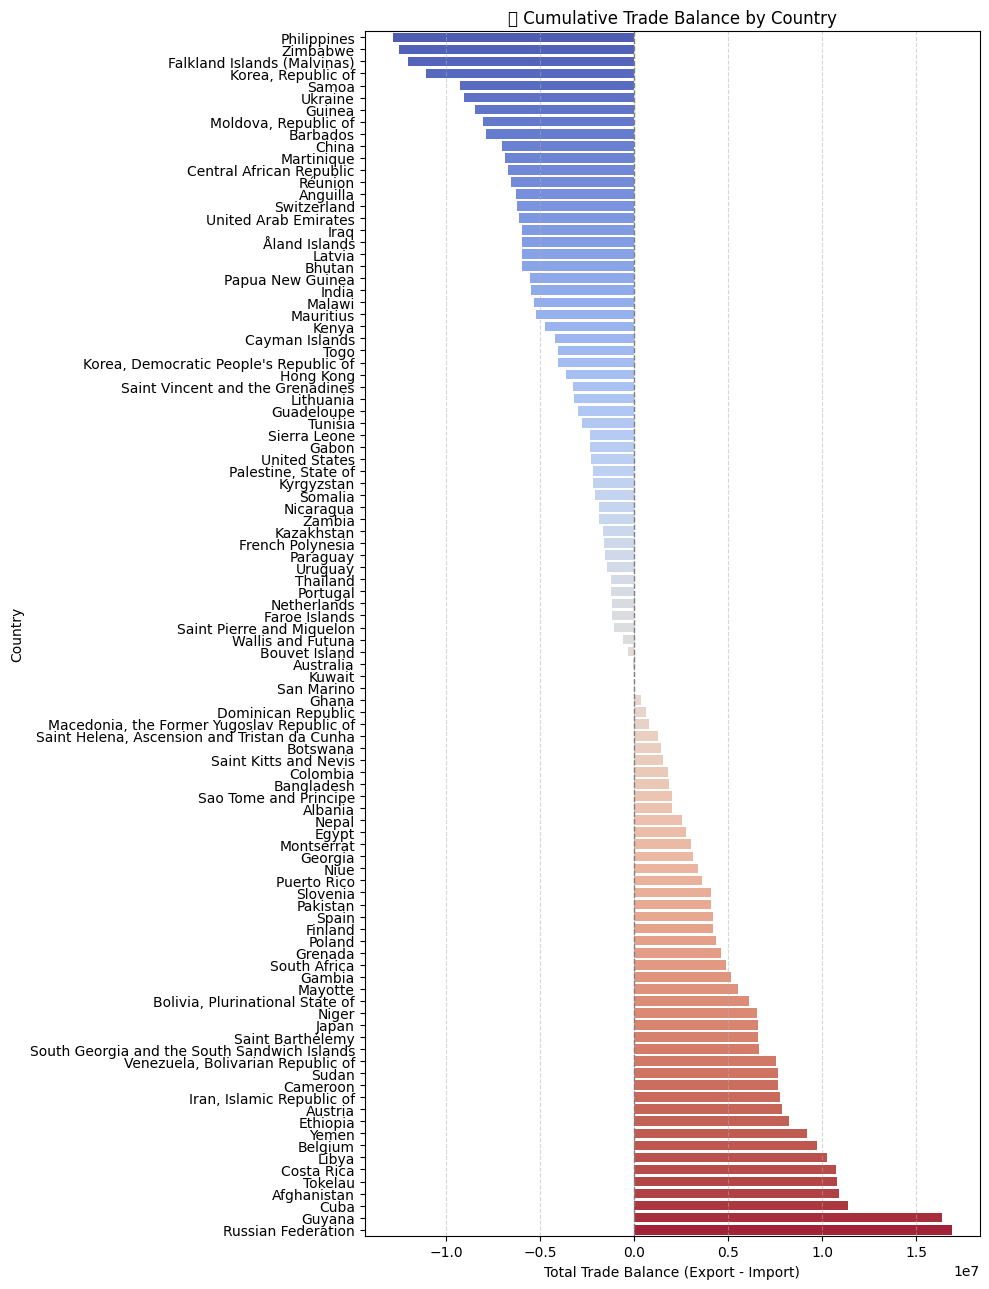

In [ ]:
# Step 14: Cumulative Trade Balance by Country

# Reuse trade balance calculation
balance_df = df.pivot_table(
    index=[pd.Grouper(key=date_col, freq='M'), country_col],
    columns=direction_col,
    values=value_col,
    aggfunc='sum',
    fill_value=0
).reset_index()

balance_df['trade_balance'] = balance_df.get('Export', 0) - balance_df.get('Import', 0)

# Aggregate cumulative trade balance per country
cumulative_balance = balance_df.groupby(country_col)['trade_balance'].sum().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 13))
sns.barplot(
    x=cumulative_balance.values,
    y=cumulative_balance.index,
    palette='coolwarm',
    orient='h'
)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.title('📊 Cumulative Trade Balance by Country')
plt.xlabel('Total Trade Balance (Export - Import)')
plt.ylabel('Country')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


**Definition: Cumulative Trade Balance**

Cumulative Trade Balance is the net sum of exports minus imports for a country (or group of countries) over a defined period of time — typically months or years.

**Cumulative Trade Balance**

∑ 𝑡
1 𝑇 ( Exports 𝑡 − Imports 𝑡 )

Where:

𝑡 = time period (e.g., month)

𝑇 = total number of periods

**What It Tells You:**

Positive value → Trade surplus: the country exported more than it imported.

Negative value → Trade deficit: the country imported more than it exported.

Magnitude → Indicates economic exposure, competitiveness, or dependency.

/tmp/ipython-input-3812920711.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3812920711.py:21: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


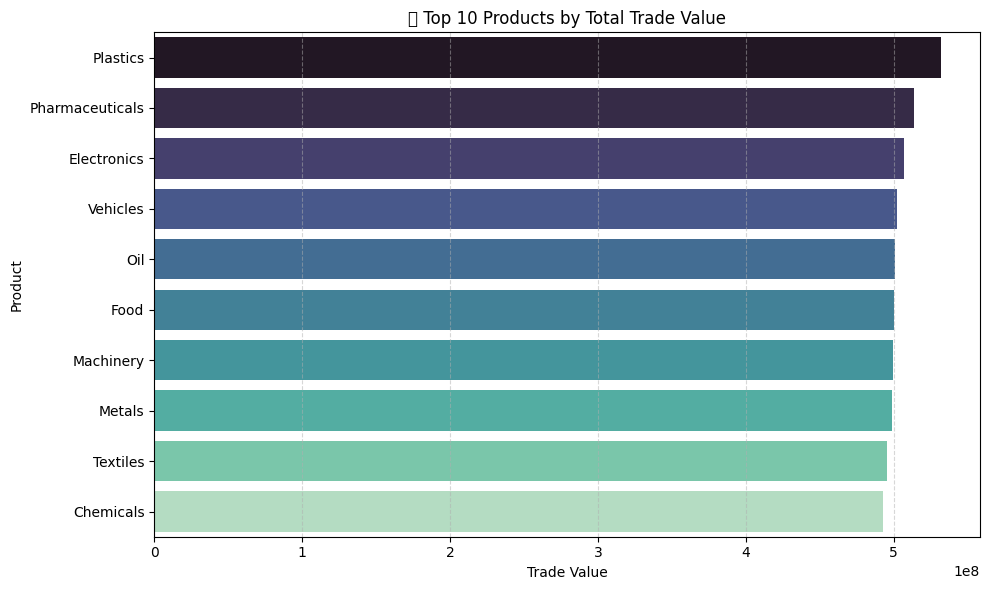

In [ ]:
#  Step 15: Top Products by Total Trade Value

# Replace with actual product column name
product_col = 'commodity'  # e.g., 'hs_code', 'product_category'

# Aggregate total trade value by product
top_products = df.groupby(product_col)[value_col].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    palette='mako',
    orient='h'
)
plt.title('📦 Top 10 Products by Total Trade Value')
plt.xlabel('Trade Value')
plt.ylabel('Product')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Final Cell: Executive Summary of Trade Insights

# Calculate total trade balance
total_trade_balance = balance_df['trade_balance'].sum()

summary = {
    "Total Trade Value": f"{df[value_col].sum():,.0f}",
    "Top Product": top_products.idxmax(),
    "Top Trading Country": top_countries.iloc[0]['country'], # Get the first country from the sorted index
    "Trade Balance Trend": "Surplus" if total_trade_balance > 0 else "Deficit",
    "Time Range": f"{df[date_col].min().strftime('%Y-%m-%d')} to {df[date_col].max().strftime('%Y-%m-%d')}", # Use date_col and format the dates
    "Data Points": len(df)
}

# Display summary
for key, value in summary.items():
    print(f"{key}: {value}")

Total Trade Value: 5,042,222,710
Top Product: Plastics
Top Trading Country: Russian Federation
Trade Balance Trend: Surplus
Time Range: 2010-01-03 to 2024-12-28
Data Points: 10000


In [ ]:
df['YoY_growth'] = df.groupby([country_col])[value_col].pct_change()


In [ ]:
df['rolling_avg'] = df[value_col].rolling(window=3).mean()


In [ ]:
# Extract information from the summary dictionary
latest_year = summary['Time Range'].split(' to ')[1].split('-')[0]
top_country = summary['Top Trading Country']
total_value = float(summary['Total Trade Value'].replace(',', '')) # Convert formatted string to float

# Get the trade value of the top product
top_product_value = top_products.max()

# Calculate the percentage contribution of the top product
pct = (top_product_value / total_value) * 100

# Get the name of the top product
top_product = top_products.idxmax()


# Construct the summary string
summary_string = f"In {latest_year}, {top_country} led trade with a total value of {total_value:,.0f}. The top product was {top_product}, contributing {pct:.2f}% of total trade."

print(summary_string)

In 2024, Russian Federation led trade with a total value of 5,042,222,710. The top product was Plastics, contributing 10.55% of total trade.


In [ ]:
pip install plotly

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Exporter': ['India', 'India', 'China', 'Germany', 'USA'],
    'Product': ['Textiles', 'Electronics', 'Electronics', 'Machinery', 'Pharmaceuticals'],
    'Importer': ['EU', 'USA', 'EU', 'India', 'India'],
    'Trade_Value': [120, 200, 180, 150, 130]
})
nodes = pd.unique(df[['Exporter', 'Product', 'Importer']].values.ravel())
node_dict = {name: i for i, name in enumerate(nodes)}

# Exporter → Product
source1 = df['Exporter'].map(node_dict)
target1 = df['Product'].map(node_dict)
value1 = df['Trade_Value']

# Product → Importer
source2 = df['Product'].map(node_dict)
target2 = df['Importer'].map(node_dict)
value2 = df['Trade_Value']

# Combine both
source = pd.concat([source1, source2])
target = pd.concat([target1, target2])
value = pd.concat([value1, value2])

import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(node_dict.keys()),
        color="skyblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Global Trade Flow Sankey", font_size=12)
fig.show()

**Global Trade Flow Overview**

This Sankey diagram illustrates how trade moves between key countries and major sectors, highlighting the interconnected nature of global commerce.

**Countries Involved:**

China & Germany: Major exporters, especially to the Machinery sector.

India: Acts as both a recipient and a secondary exporter, bridging flows between sectors.

EU & USA: Final destinations for high-value sectors like Electronics and Pharmaceuticals.

**Sectoral Flow:**

Machinery: Receives exports from China and Germany, then flows to India.

Electronics & Textiles: India exports to these sectors, which then flow outward.

Pharmaceuticals: Receives inputs from Textiles and flows to the USA.

**Trade Dynamics:**

The diagram reveals a multi-stage flow: raw exports → sectoral transformation → re-export.

India plays a pivotal role in value chain integration, acting as a hub between upstream exporters and downstream consumers.

USA emerges as a key end-market, especially for high-tech and health-related goods.

**Conclusion**

The Global Trade Analysis project transforms raw import–export data into meaningful intelligence by combining rigorous preprocessing, advanced visualization, and multilevel exploration. The study highlights how trade dynamics are shaped by both country-level strengths (e.g., China and Germany’s export dominance, India’s role as a transformation hub) and sectoral gateways (Machinery, Electronics, Pharmaceuticals). Patterns of surpluses and deficits underscore structural imbalances—consumer-driven economies sustain demand while industrial hubs drive supply.

By integrating univariate, bivariate, and multivariate perspectives, the analysis captures not only individual trade features but also their interdependencies across nations and sectors. The modular, reproducible pipeline ensures scalability, enabling seamless integration into dashboards, policy simulations, and forecasting models.

Overall, this framework equips businesses, policymakers, and researchers with actionable insights to understand trade flows, anticipate market shifts, and make informed strategic decisions in an increasingly interconnected global economy.